In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s163/20210527-1418/",
            "../checkpoints/s163-longer/20210527-1418/",
            "../checkpoints/s166/20210526-1037/",
            "../checkpoints/s167/20210526-1038/",]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                        baseline_rule-based   
ddqn_new                                           0   
lr                                              0.01   
batch_size                                       128   
lambda_rwd_energy                              5e-06   
energy_cons_in_kWh                                 0   
log_rwd_energy                                     0   
reward_offset                                    0.0   
clip_econs_at                                    0.0   
ddqn_loss                                         L2   
target_network_update_freq                         3   
epsilon_final_step                               100   
epsilon_decay_mode                       exponential   
episodes_count                                   100   
agent_network                 2HiddenLayer,Trapezium   
agent_init_gain                                  0.8   
use_layer_normalization                            0   
fewer_q_values                                     0   
agent_w_l2                                     1e-05   
network_storage_frequency                         10   
model                        Building_5ZoneAirCooled   
single_setpoint_agent_count                      all   
next_occ_horizont                                  0   
rulebase_with_VAV                                  0   

                                                               s163  \
algorithm                                                      ddqn   
ddqn_new                                                        NaN   
lr                                                              0.1   
batch_size                                                      256   
lambda_rwd_energy                                              0.13   
energy_cons_in_kWh                                              NaN   
log_rwd_energy                                                  NaN   
reward_offset                                                   0.3   
clip_econs_at                                                   NaN   
ddqn_loss                                                       NaN   
target_network_update_freq                                        3   
epsilon_final_step                                            19200   
epsilon_decay_mode                                           linear   
episodes_count                                                  160   
agent_network                           2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                 0.7   
use_layer_normalization                                           1   
fewer_q_values                                                    1   
agent_w_l2                                                    1e-06   
network_storage_frequency                                       160   
model                        Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                            one_but3not5   
next_occ_horizont                                                 2   
rulebase_with_VAV                                               NaN   

                                                        s163-longer  \
algorithm                                                      ddqn   
ddqn_new                                                        NaN   
lr                                                              0.1   
batch_size                                                      256   
lambda_rwd_energy                                              0.13   
energy_cons_in_kWh                                              NaN   
log_rwd_energy                                                  NaN   
reward_offset                                                   0.3   
clip_econs_at                                                   NaN   
ddqn_loss                                                       NaN   
target_network_update_freq                                        3   
epsilon_final_step 

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s163  \
Number of training episodes                      1.0   19200.000000   
Runtime in s                                     0.0  102913.743602   
Runtime in h                                     0.0      28.587151   
Mean episode runtime in s                        0.0       5.360091   
Mean episode runtime during eval. episode in s   0.0       5.299716   
Mean episode runtime after eval. episode in s    NaN       5.129057   
Mean episode runtime in no eval. episode in s    NaN       5.360471   

                                                  s163-longer           s166  \
Number of training episodes                      54400.000000   24480.000000   
Runtime in s                                    329034.193829  155964.998046   
Runtime in h                                        91.398387      43.323611   
Mean episode runtime in s                            6.048423       6.371119   
Mean episode runtime during eval. episode in s       5.581024       6.178055   
Mean episode runtime after eval. episode in s        5.334194       5.877746   
Mean episode runtime in no eval. episode in s        6.051362       6.372333   

                                                         s167  
Number of training episodes                      26357.000000  
Runtime in s                                    107334.373373  
Runtime in h                                        29.815104  
Mean episode runtime in s                            4.072329  
Mean episode runtime during eval. episode in s       4.234168  
Mean episode runtime after eval. episode in s        3.966268  
Mean episode runtime in no eval. episode in s        4.071316

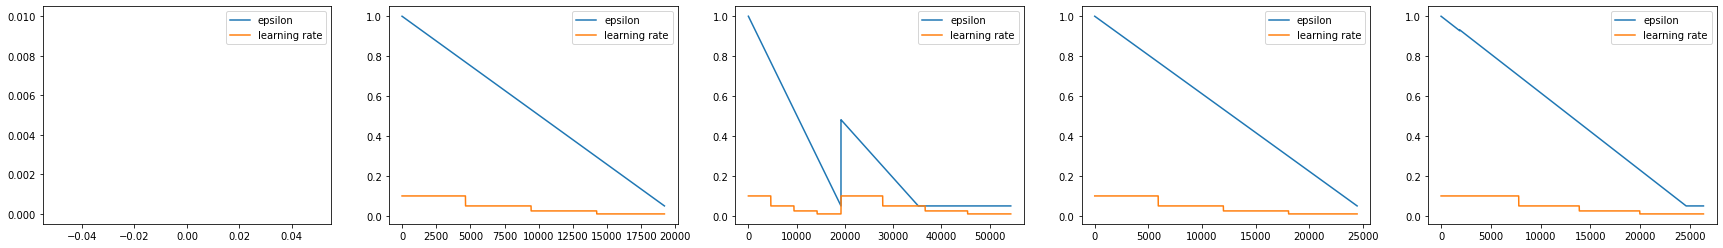

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

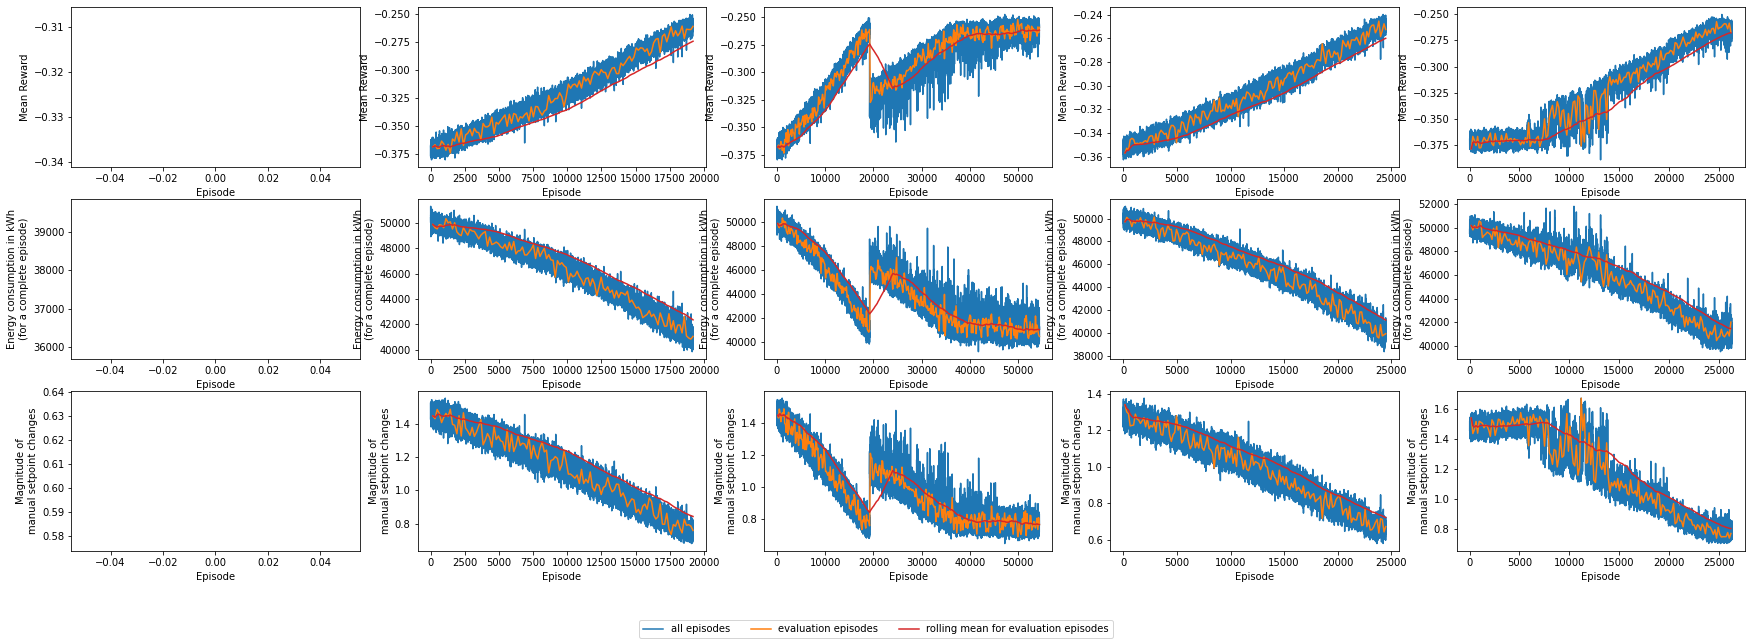

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

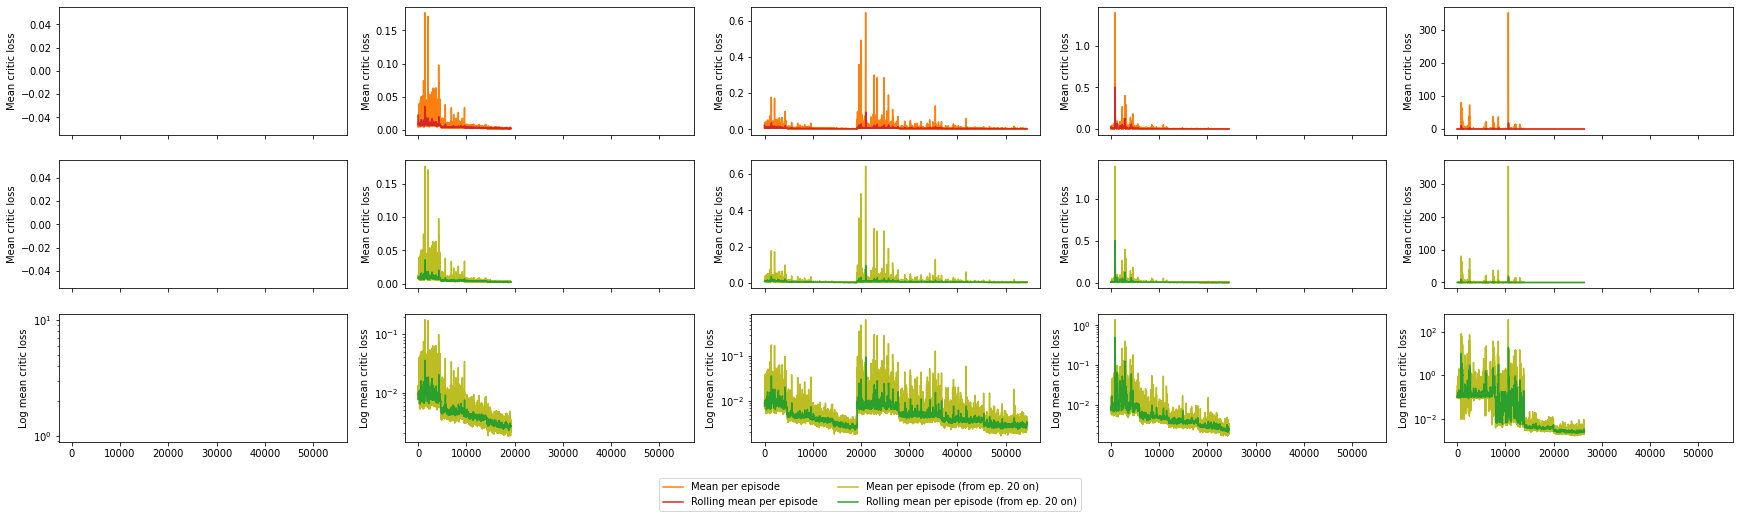

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

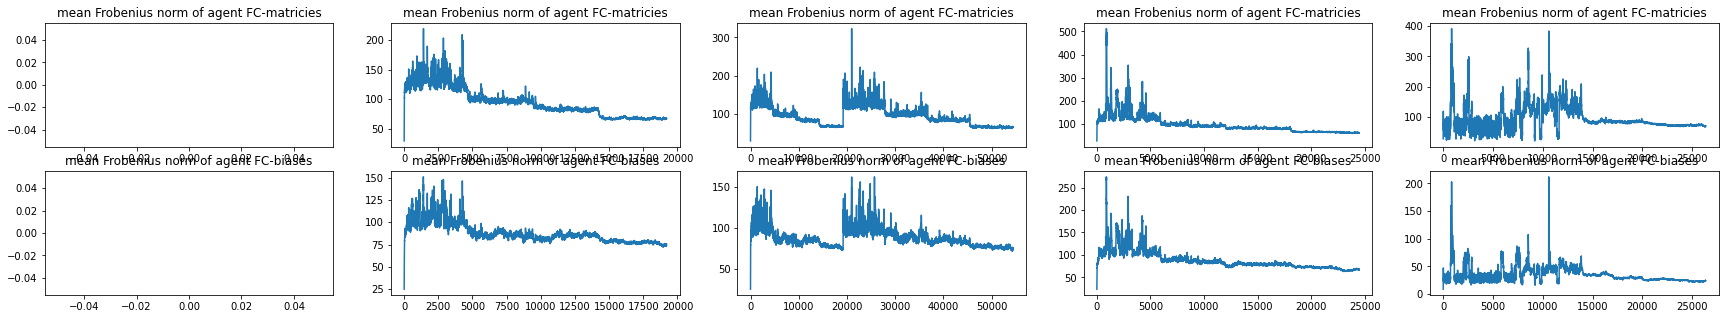

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  19199
Last available evaluation episode for dfs2:  54399
Last available evaluation episode for dfs3:  24479
Last available evaluation episode for dfs4:  26239


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   37769.46 kWh; Numer of setpoint changes: 436.6112016548903
For episode 19199: Energy consumption:   41062.39 kWh; Numer of setpoint changes: 546.7011764507602
For episode 54399: Energy consumption:   40485.19 kWh; Numer of setpoint changes: 552.1719259332785
For episode 24479: Energy consumption:   39929.73 kWh; Numer of setpoint changes: 482.9205816765715
For episode 26239: Energy consumption:   41584.15 kWh; Numer of setpoint changes: 582.604128005572

Mean values for episode ...
...     0: Reward: -0.32338 kWh; Setpoint change magnit.:  0.60725; Energy cons.: 52530.54541
... 19199: Reward: -0.26126 kWh; Setpoint change magnit.:  0.76036; Energy cons.: 57110.41645
... 54399: Reward: -0.25940 kWh; Setpoint change magnit.:  0.76797; Energy cons.: 56307.63594
... 24479: Reward: -0.25263 kWh; Setpoint change magnit.:  0.67166; Energy cons.: 55535.08852
... 26239: Reward: -0.26933 kWh; Setpoint change magni

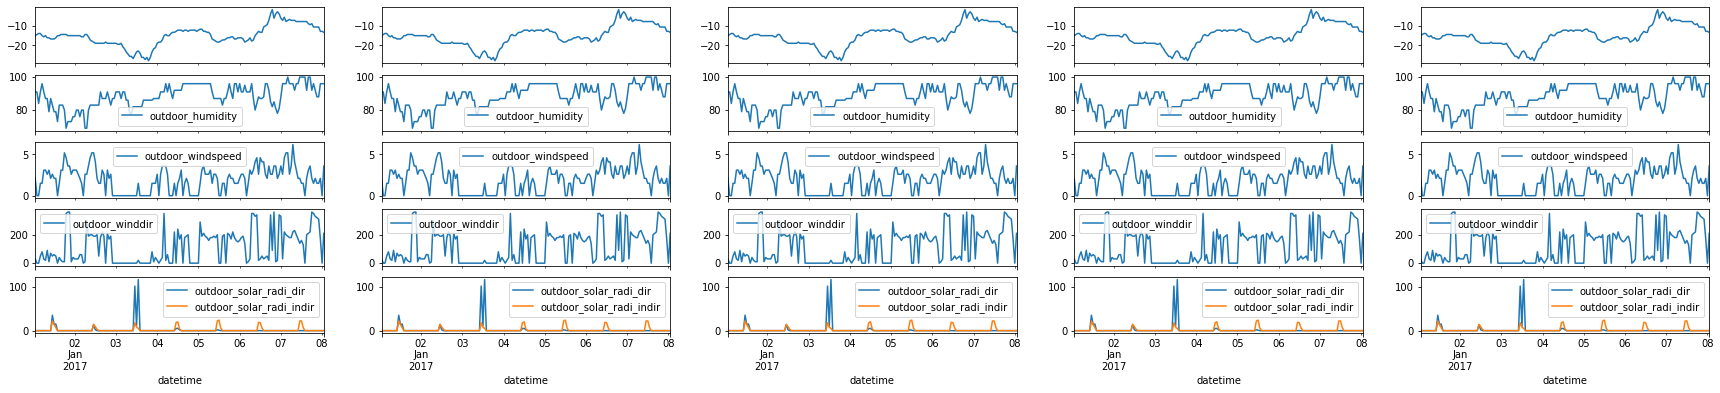

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

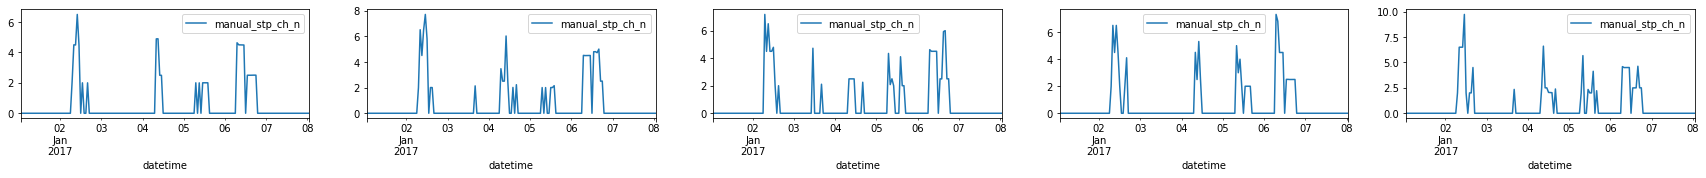

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

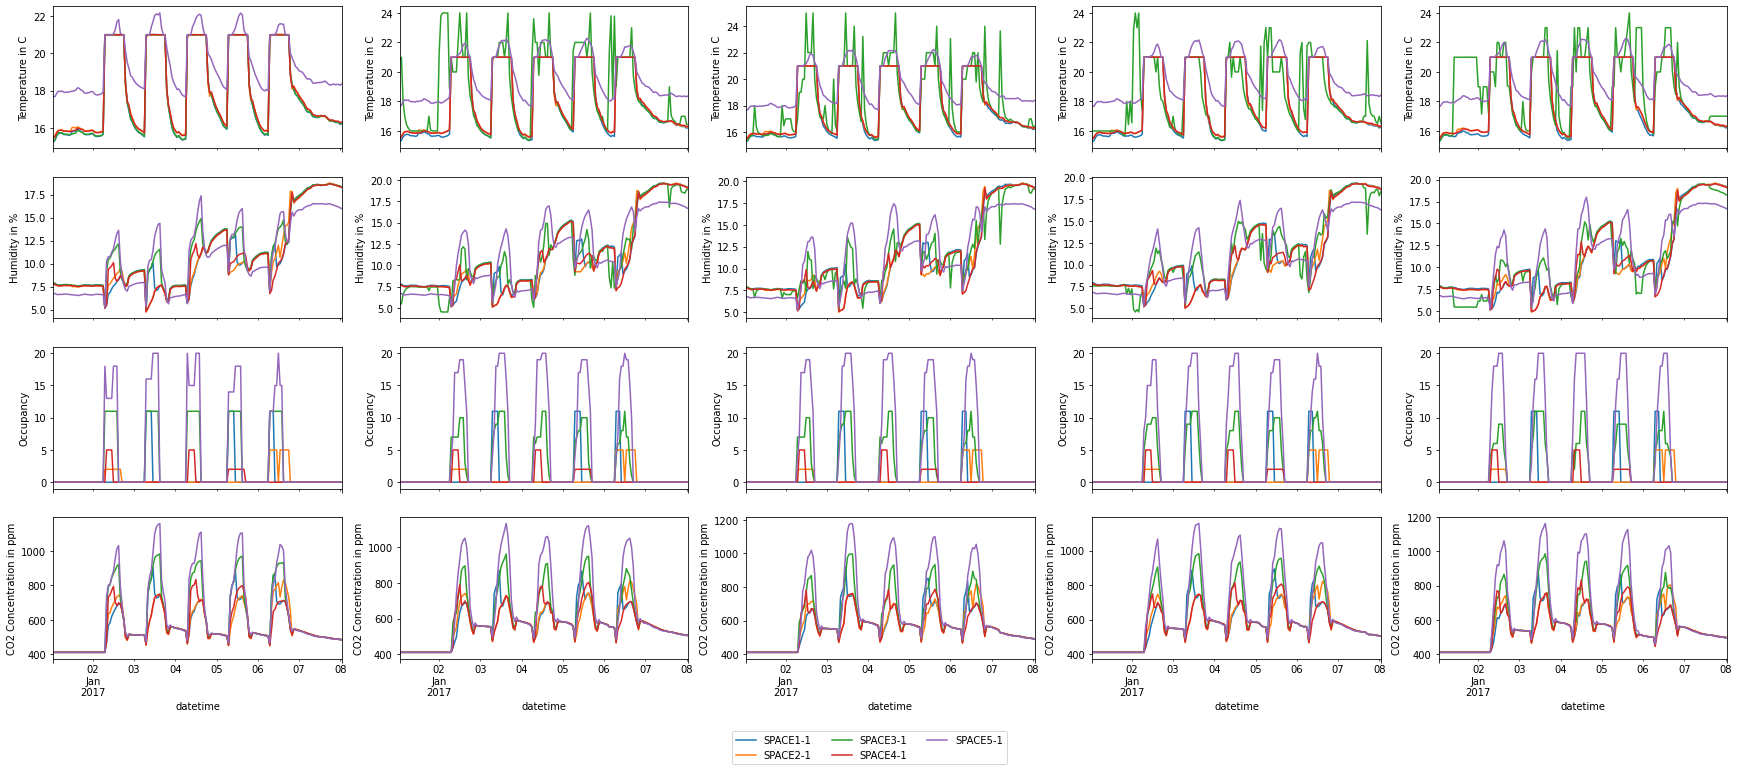

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE3-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE3-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE3-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE3-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE2

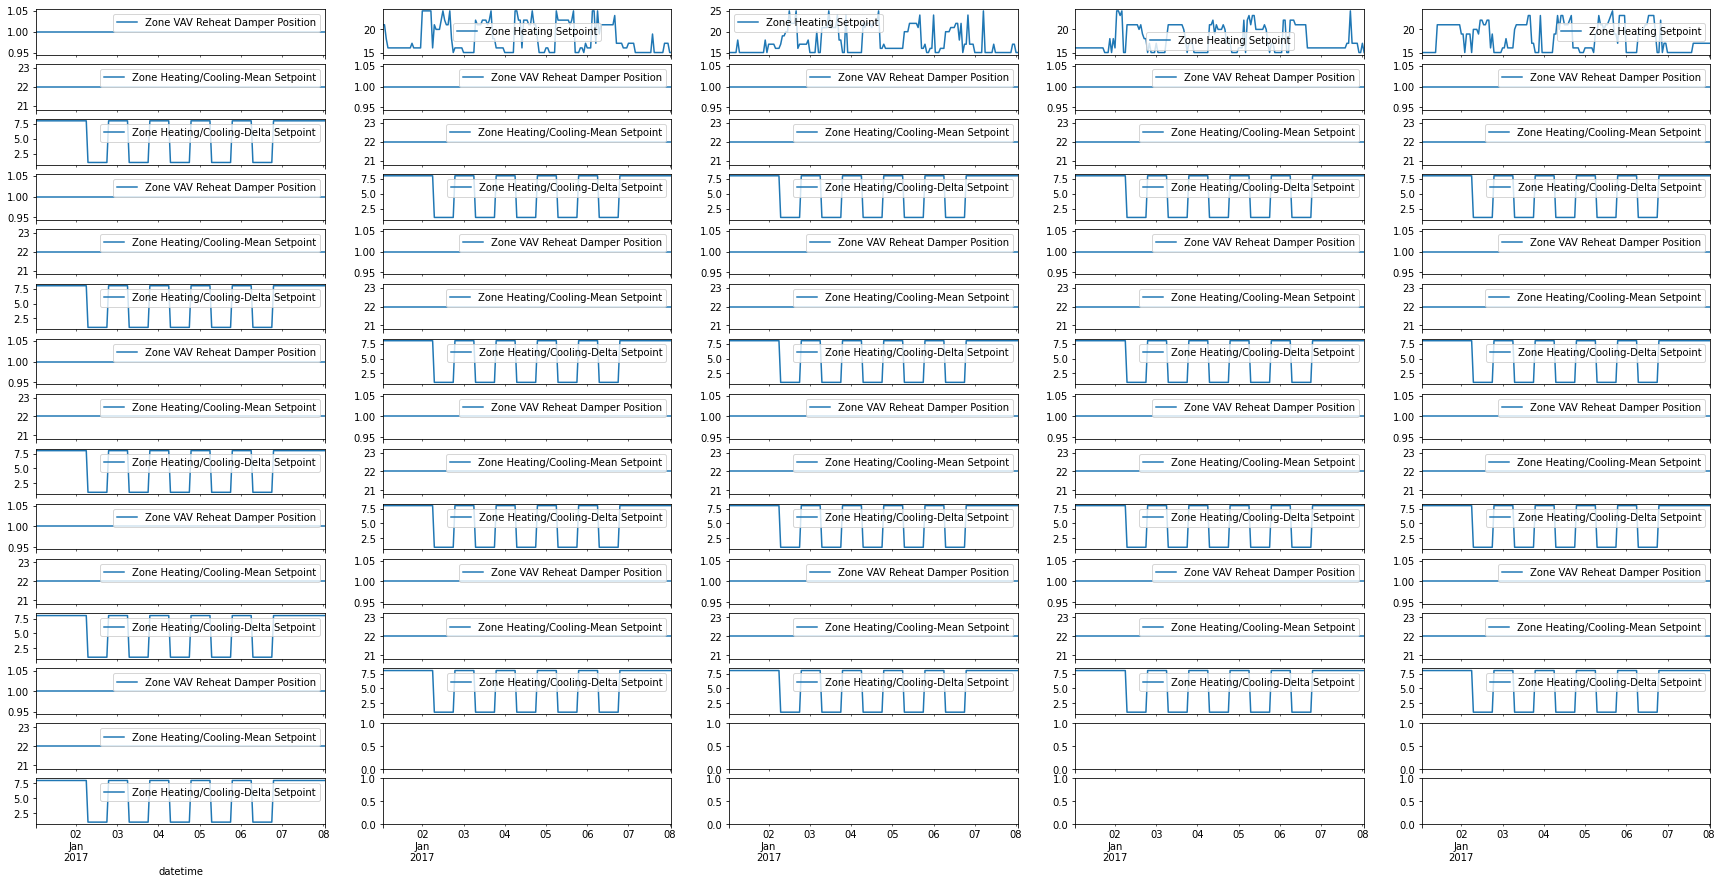

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

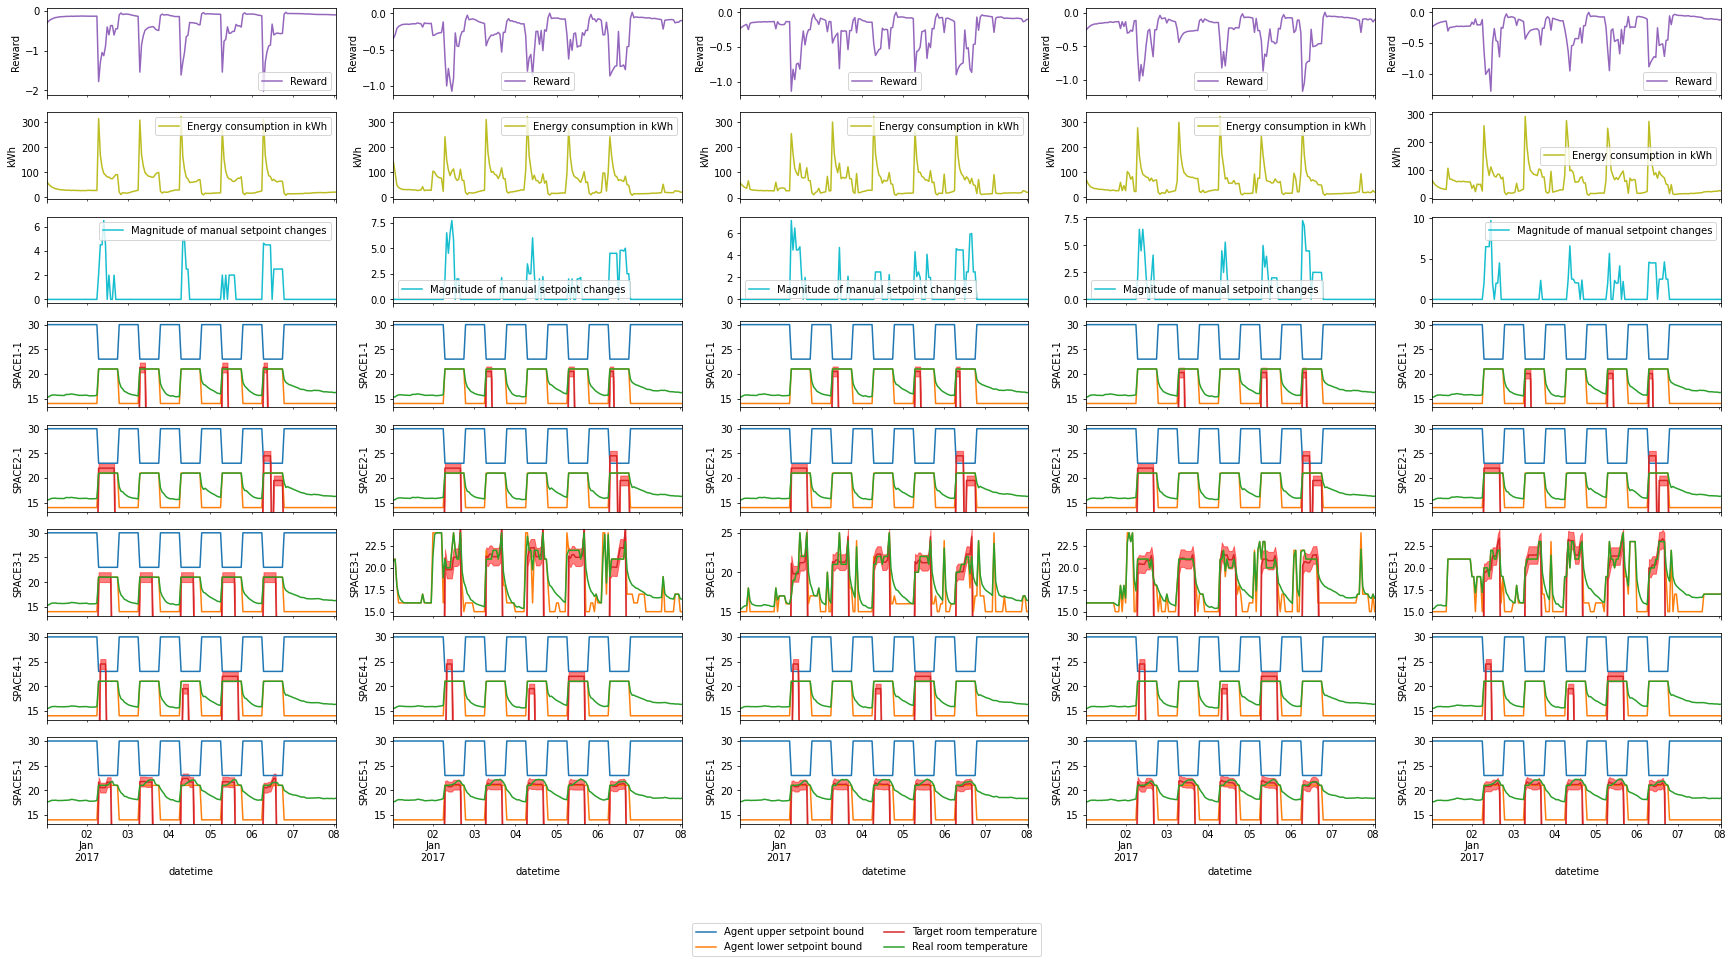

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

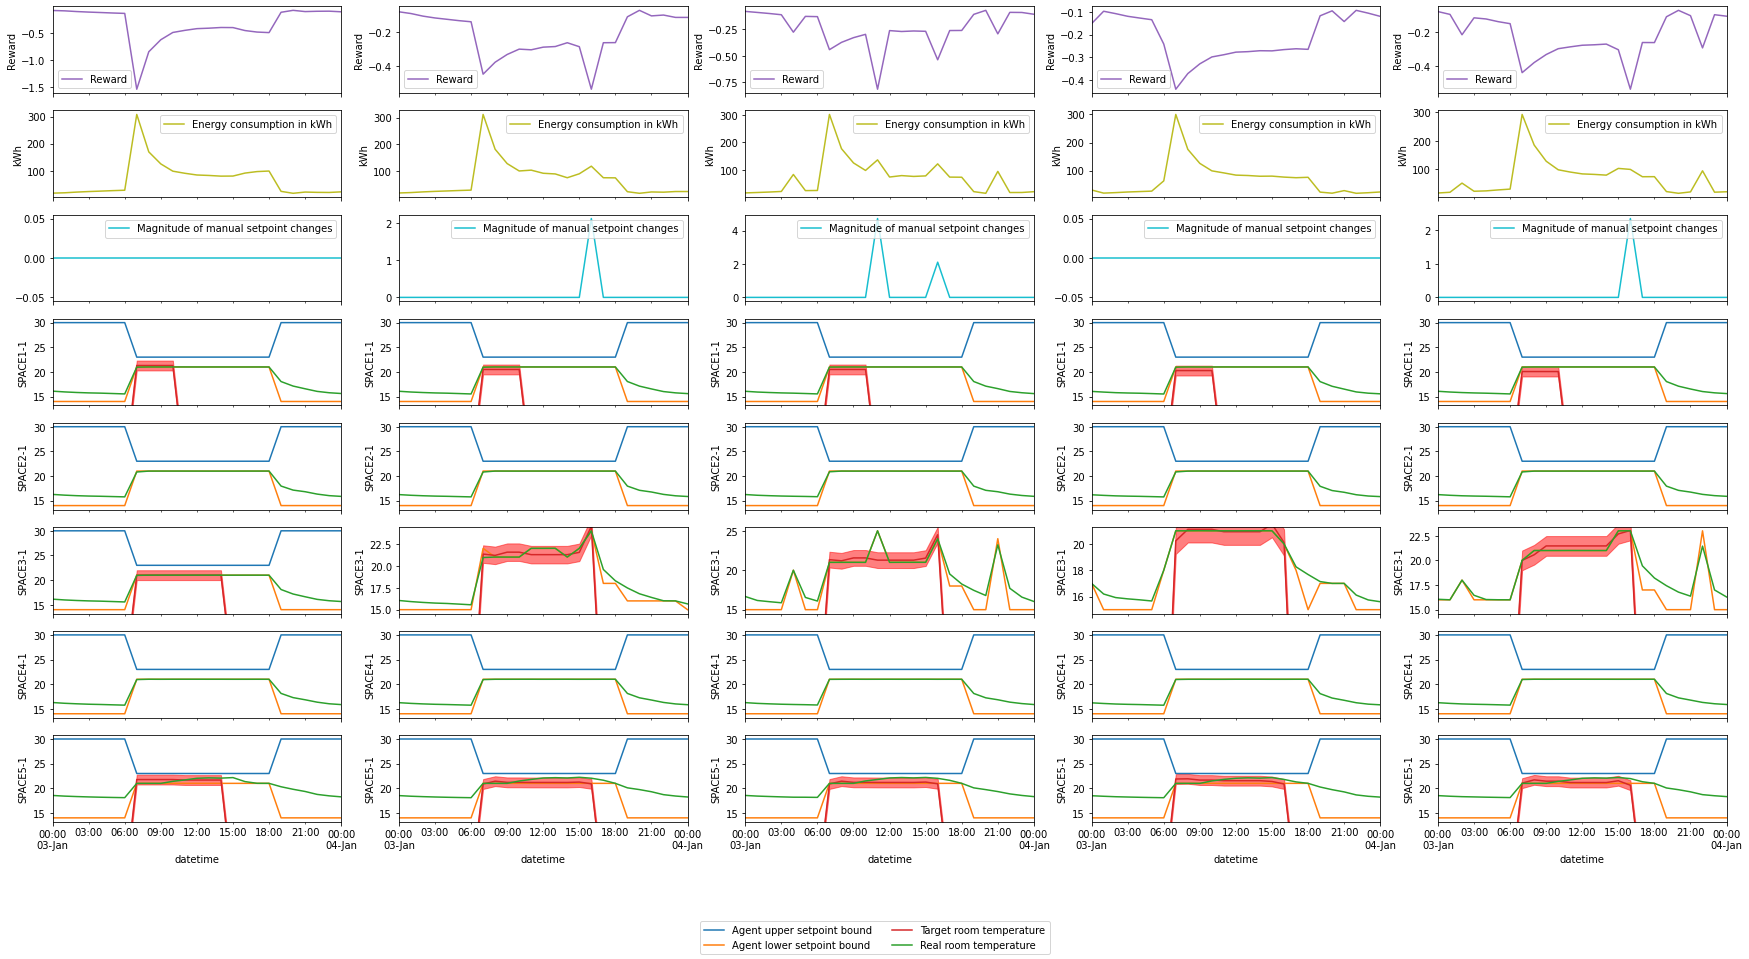

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  51641.8 Wh, mean reward = -0.3167
For plot number 2, mean energy consumption =  56293.6 Wh, mean reward = -0.2575
For plot number 3, mean energy consumption =  55539.9 Wh, mean reward = -0.2553
For plot number 4, mean energy consumption =  54682.2 Wh, mean reward = -0.2484
For plot number 5, mean energy consumption =  56971.5 Wh, mean reward = -0.2653


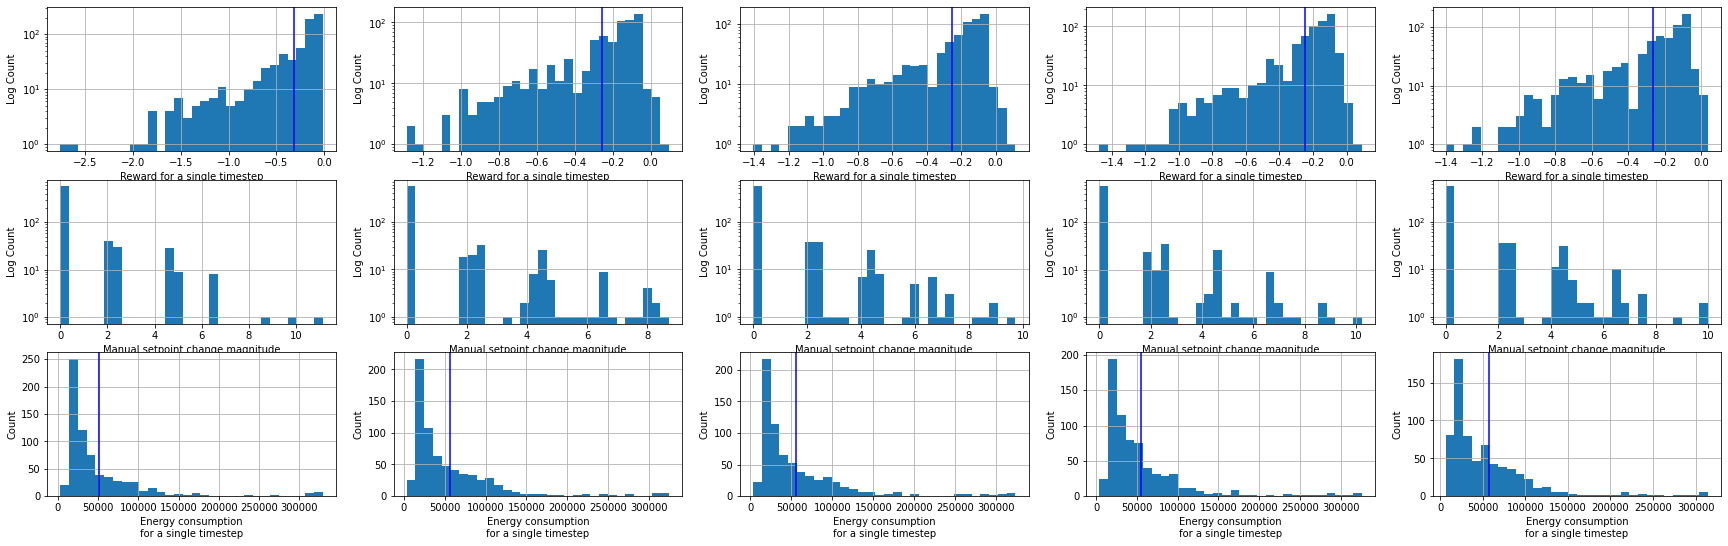

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

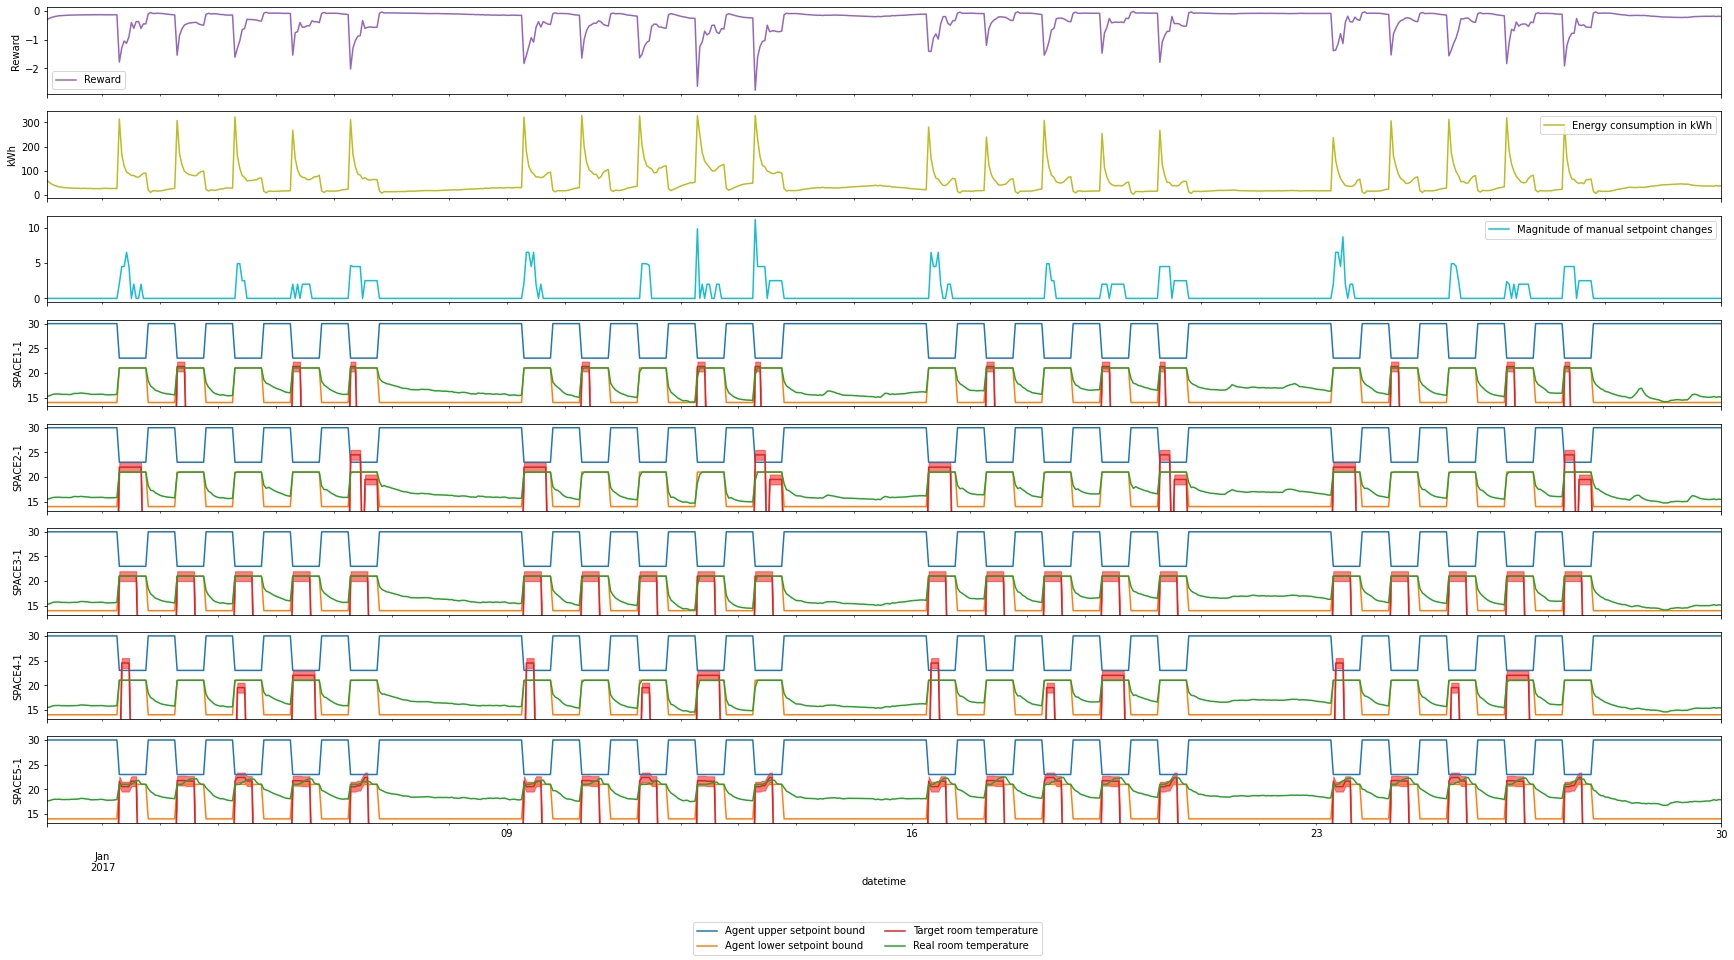

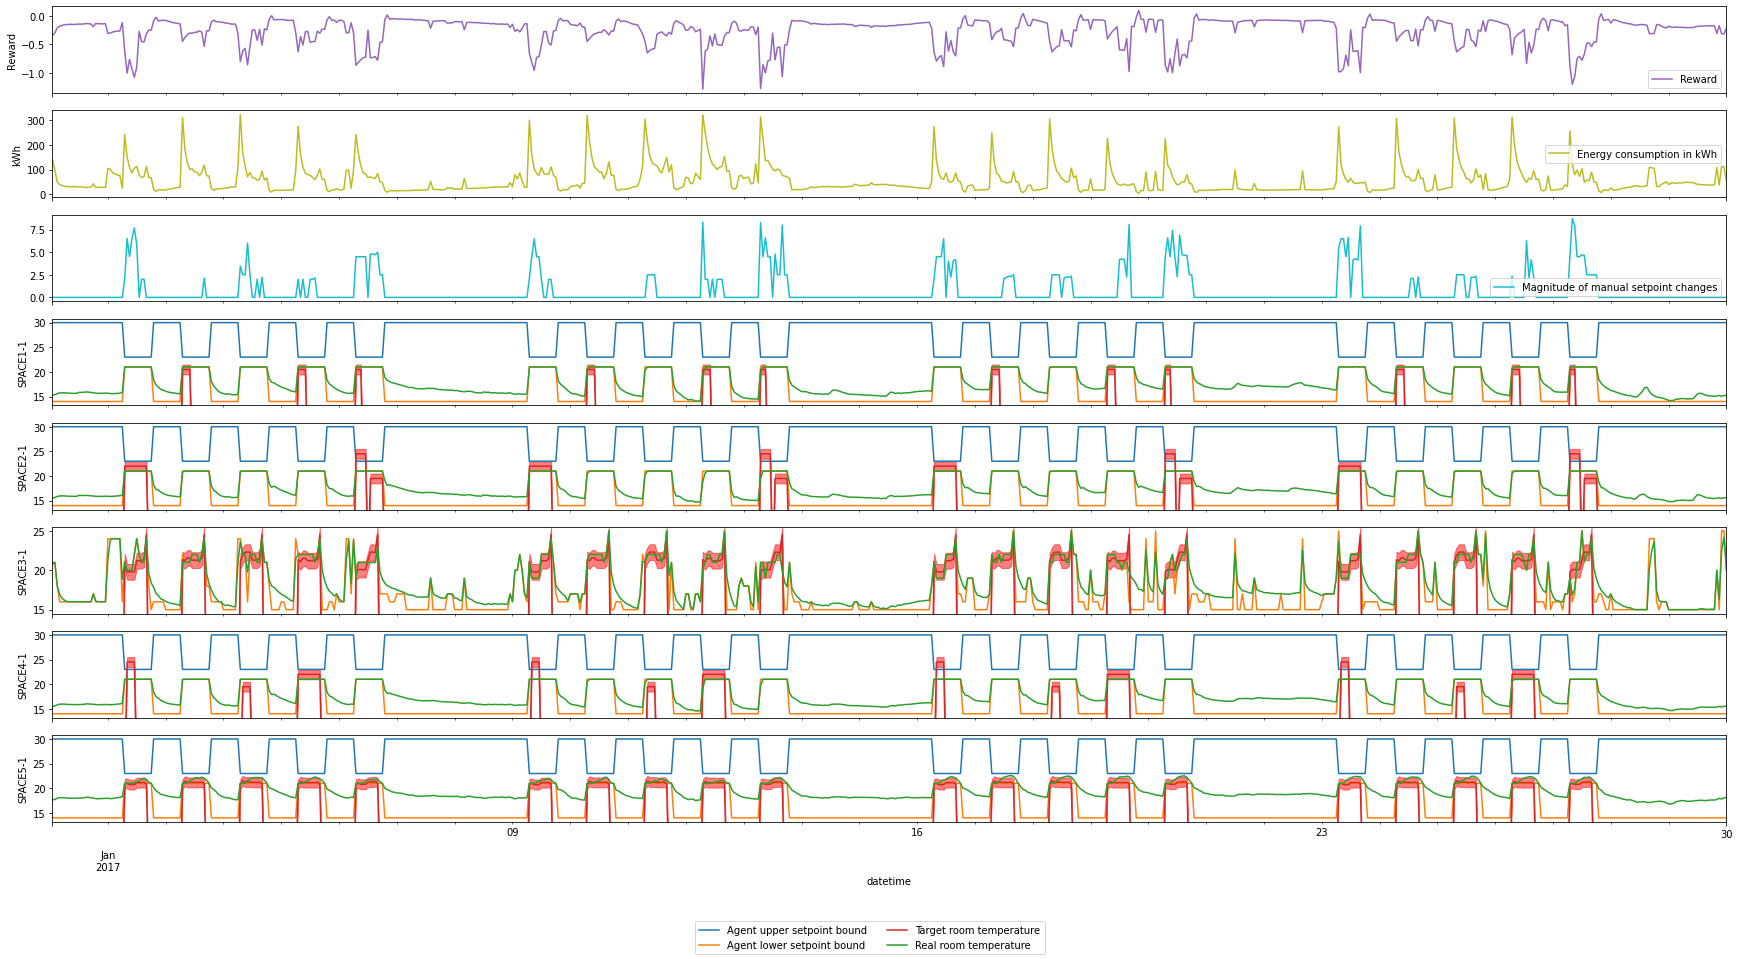

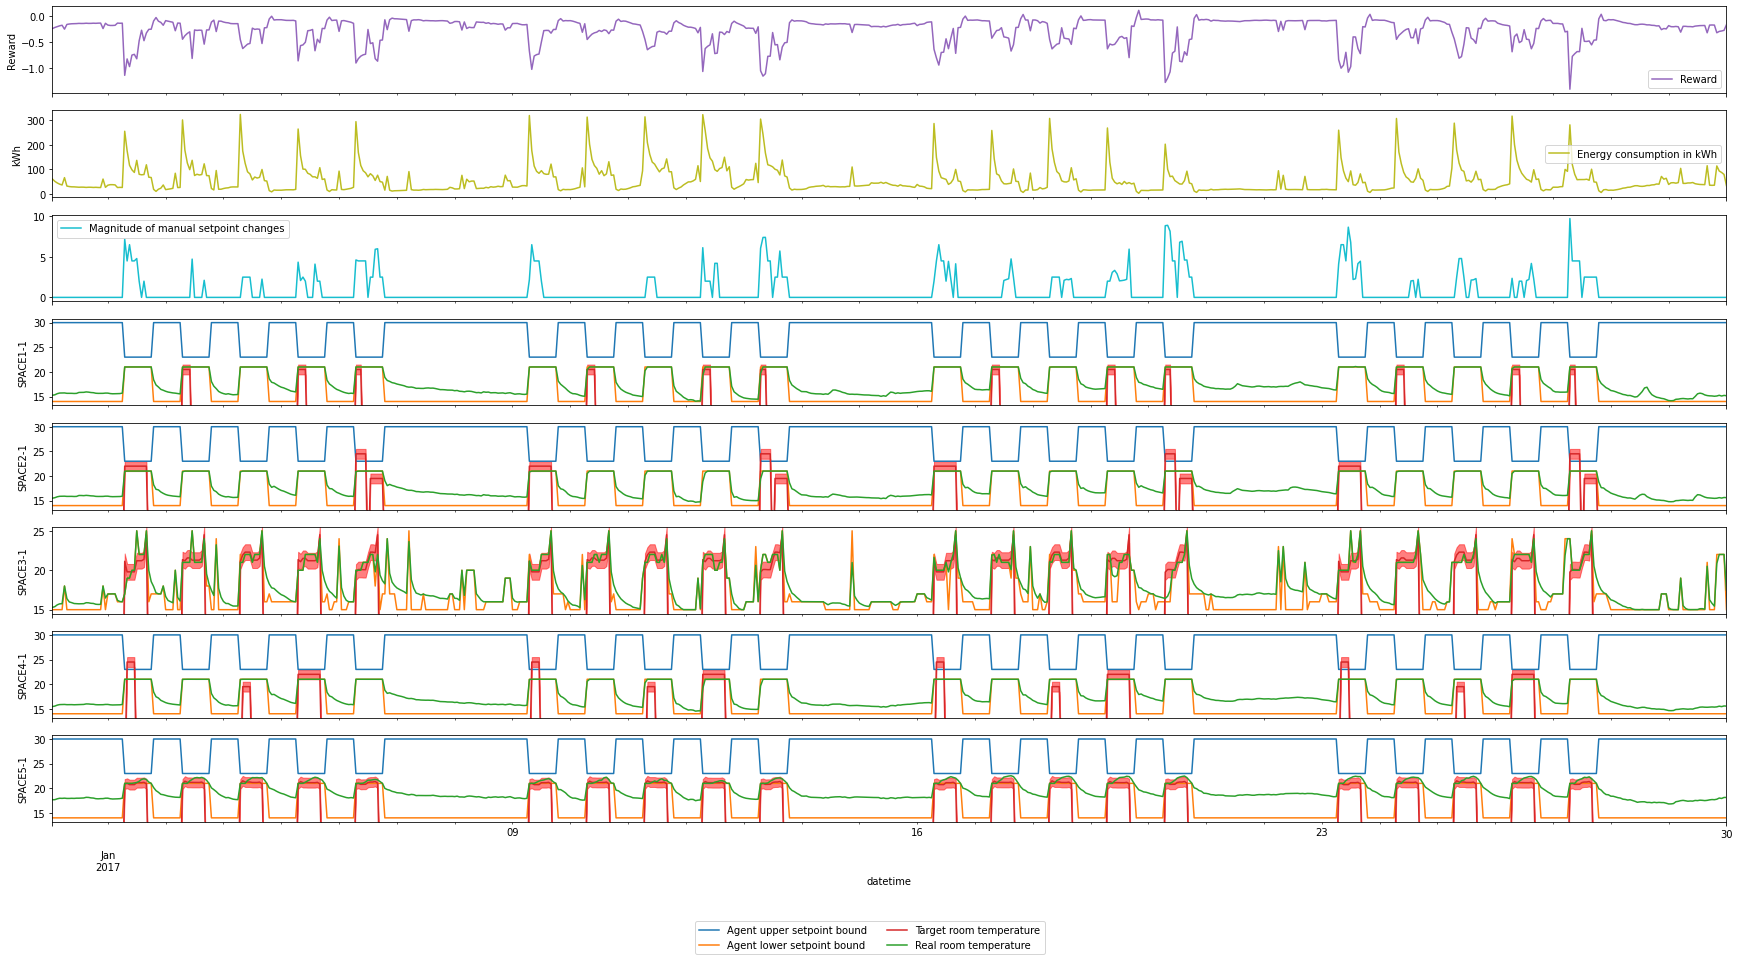

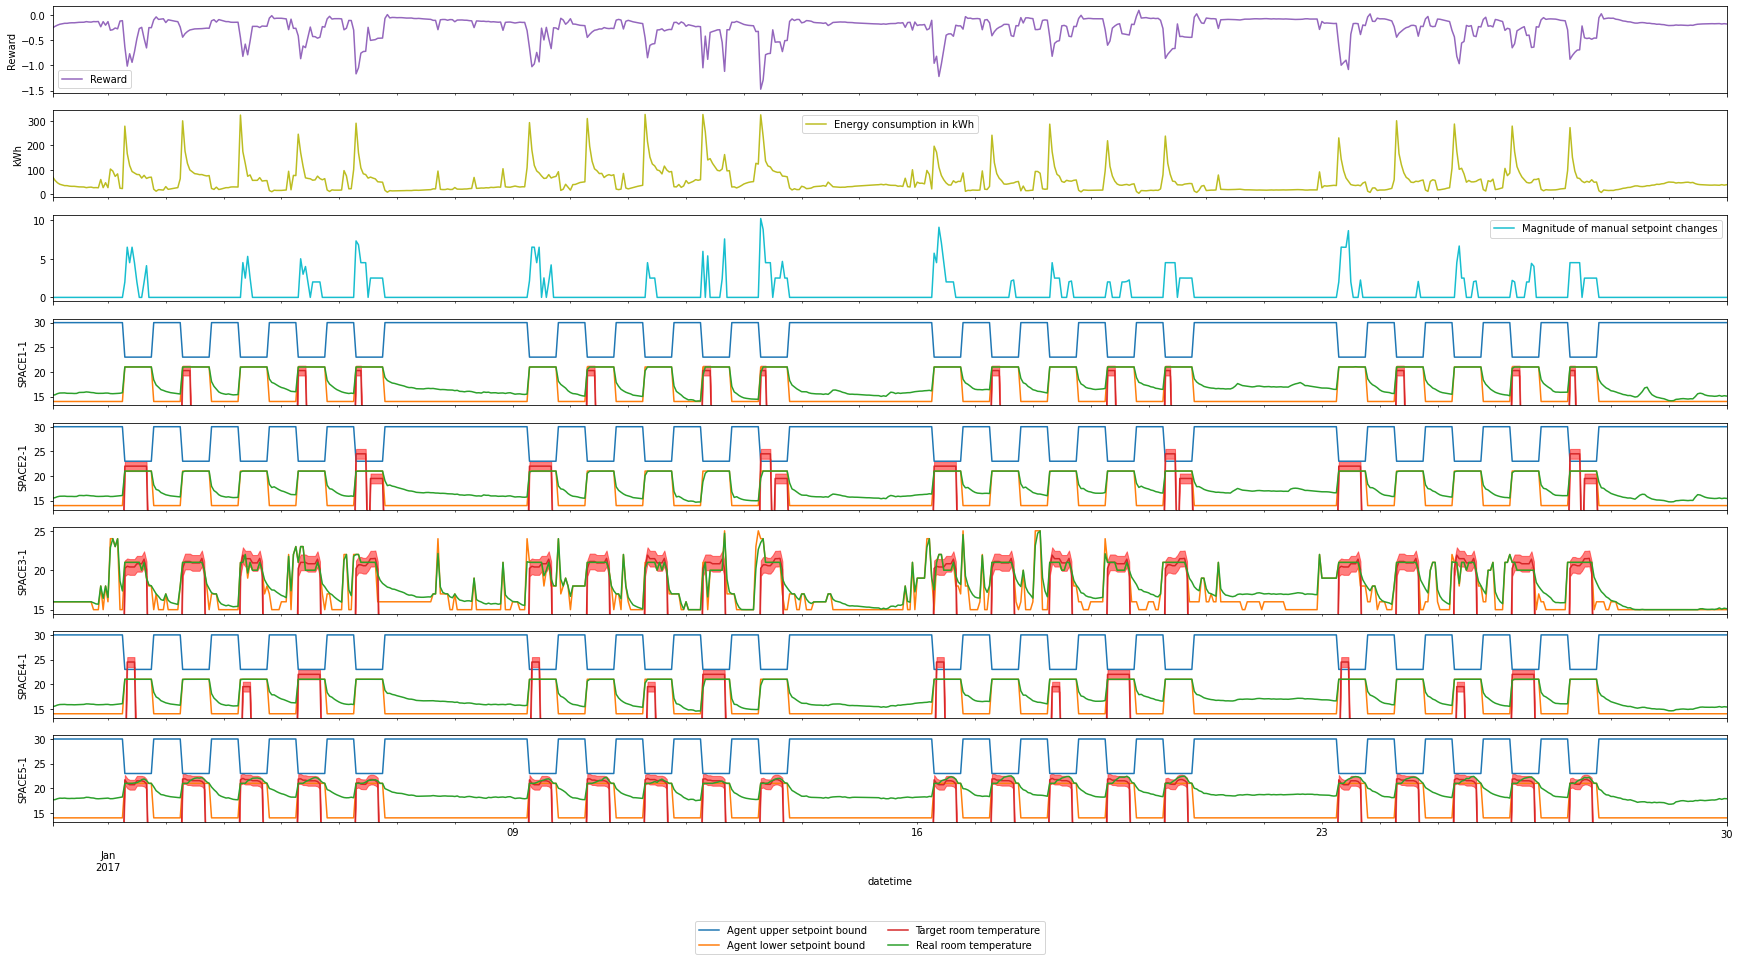

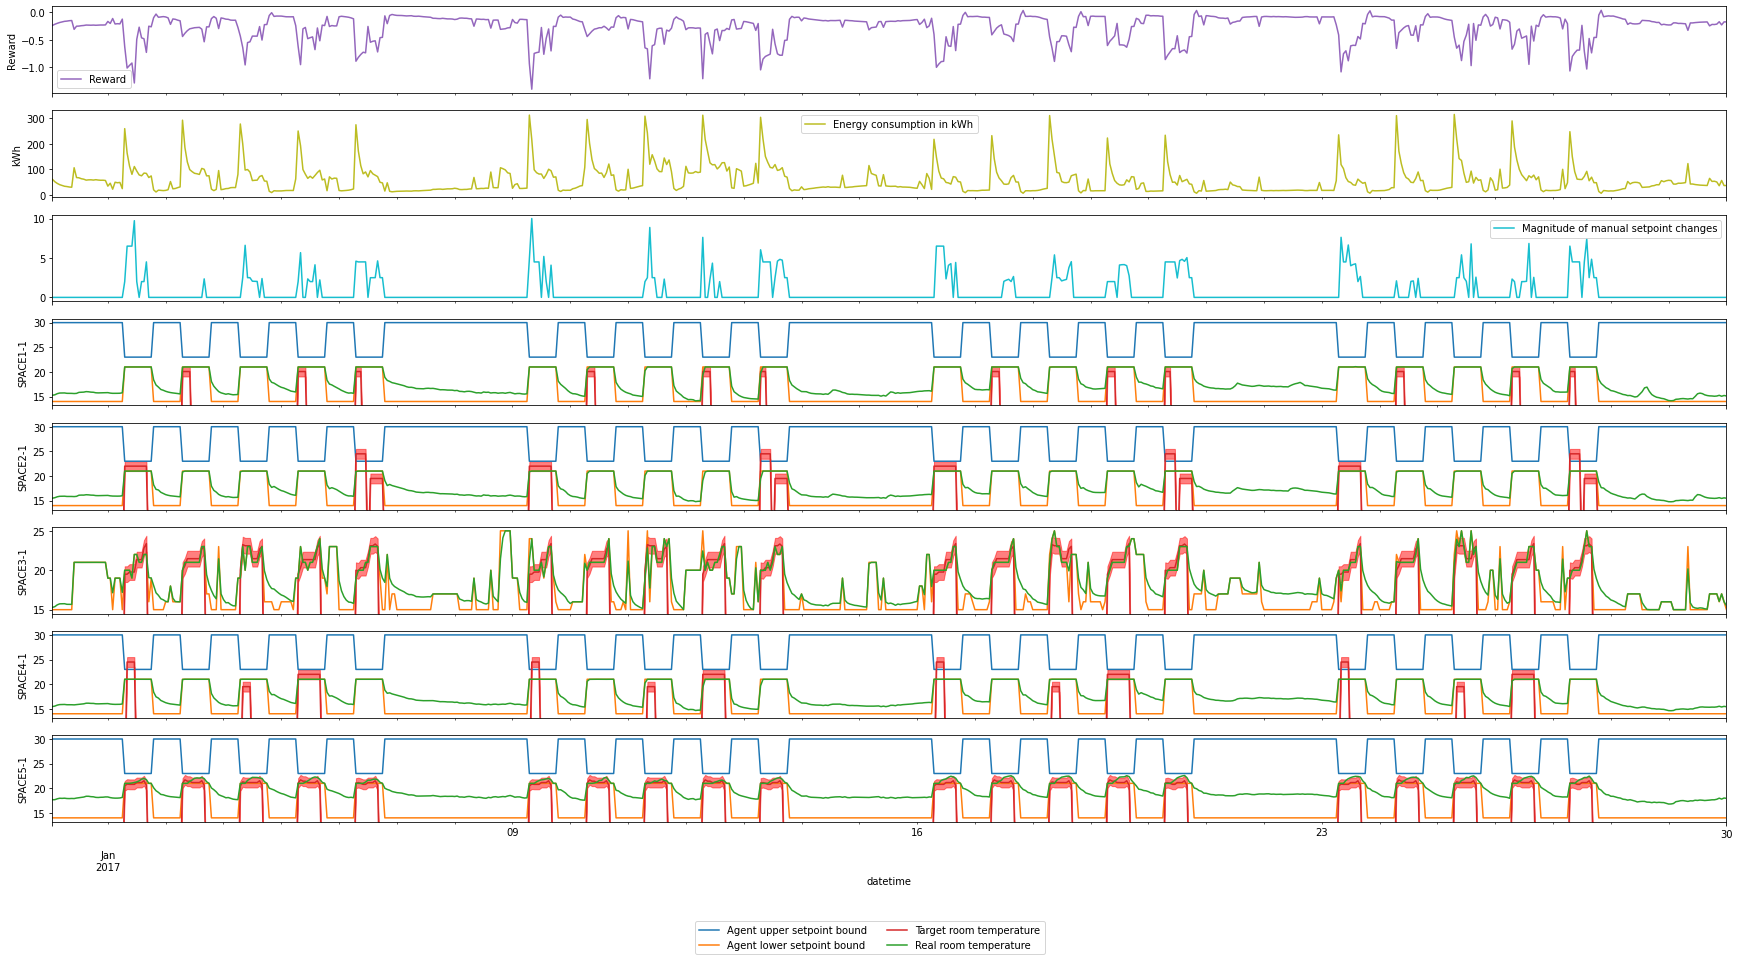

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s163, agent 1
No q-values available for scenario 1: s163, agent 2
No q-values available for scenario 1: s163, agent 3
No q-values available for scenario 1: s163, agent 4
No q-values available for scenario 2: s163-longer, agent 1
No q-values available for scenario 2: s163-longer, agent 2
No q-values available for scenario 2: s163-longer, agent 3
No q-values available for scenario 2: s163-longer, agent 4
No q-values available for scenario 3: s166, agent 1
No q-values available for scenario 3: s166, agent 2
No q-values available for scenario 3: s166, agent 3
No q-values available for scenario 3: s166, agent 4
No q-values available for scenario 4: s167, agent 1
No q-values available for scenario 4: s167, agent 2
No q-values available for scenario 4: s167, agent 3
No q-values available for scenario 4: s167, agent 4


(<Figure size 2160x864 with 8 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s163\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s163-longer\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s166\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 4: s167\nAgent 0'>], dtype=object))

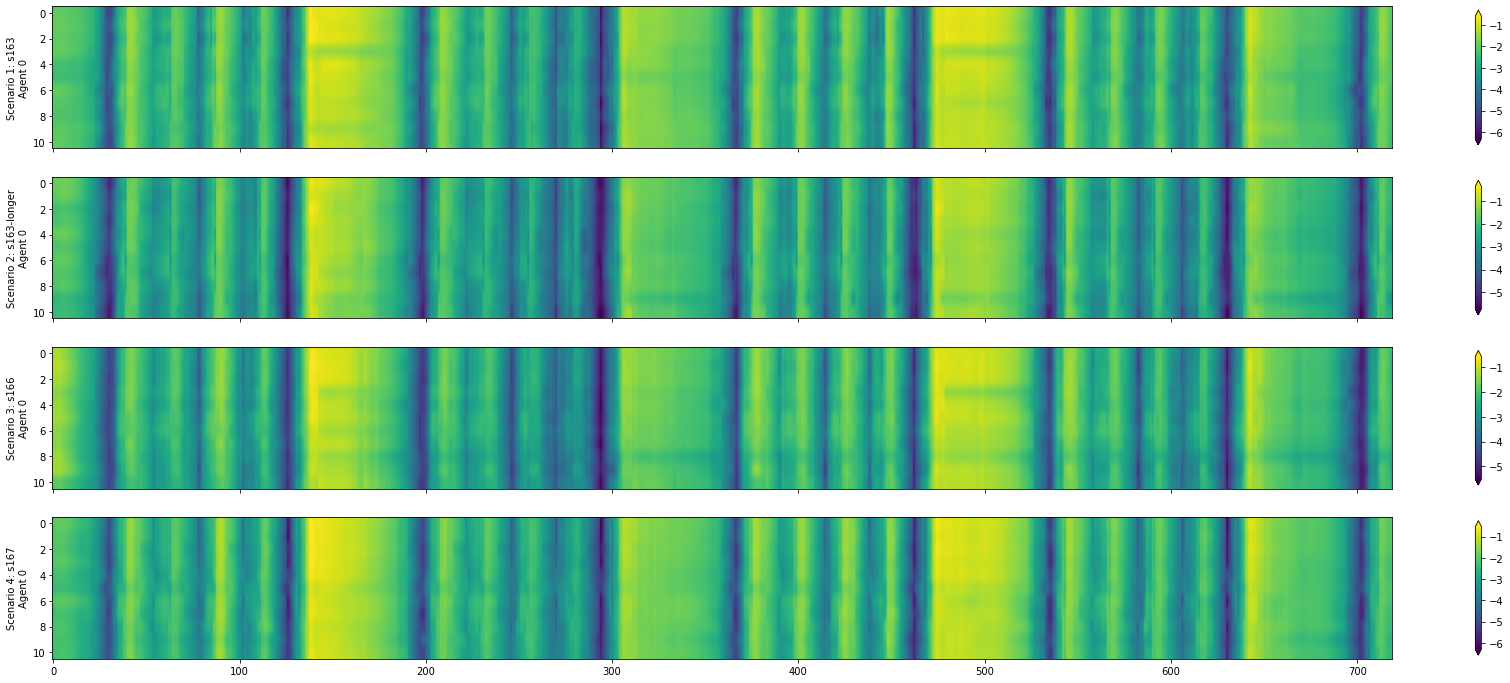

In [33]:
vh.plot_q_values(q_values, fig_width)

In [34]:
orig_data = alldfs[-1]['sees'].loc[alldfs[-1]['sees'].loc[:,"episode"] == 26239]['energy_Wh']/1000
clipped   = orig_data.clip(0,150)
rolling_mean_3  = orig_data.rolling(window=3 , min_periods=0).mean()
rolling_mean_10 = orig_data.rolling(window=10, min_periods=0).mean()
rolling_mean_20 = orig_data.rolling(window=20, min_periods=0).mean()
rolling_mean_c_3  = clipped.rolling(window=3 , min_periods=0).mean()
rolling_mean_c_10 = clipped.rolling(window=10, min_periods=0).mean()
rolling_mean_c_20 = clipped.rolling(window=20, min_periods=0).mean()

differential = orig_data.diff(periods = 1)
differential_clipped = differential.clip(-125,125)

orig_from_clipped_diff = differential_clipped.cumsum()

<AxesSubplot:>

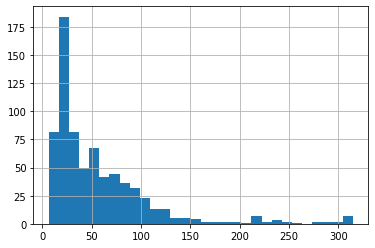

In [35]:
orig_data.hist(bins=30)

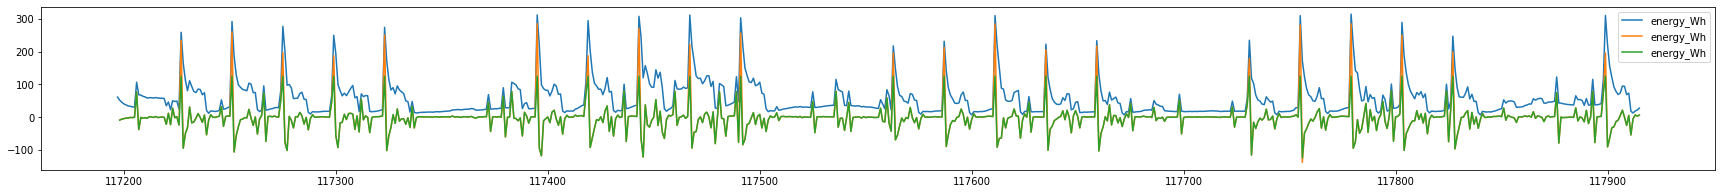

In [36]:
plt.figure(figsize=(30,3))
orig_data.plot()
differential.plot()
differential_clipped.plot()
plt.legend()

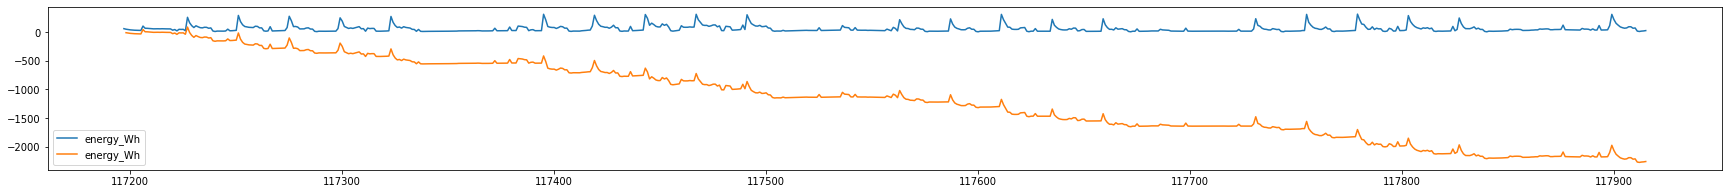

In [37]:
plt.figure(figsize=(30,3))
orig_data.plot()
orig_from_clipped_diff.plot()
plt.legend()

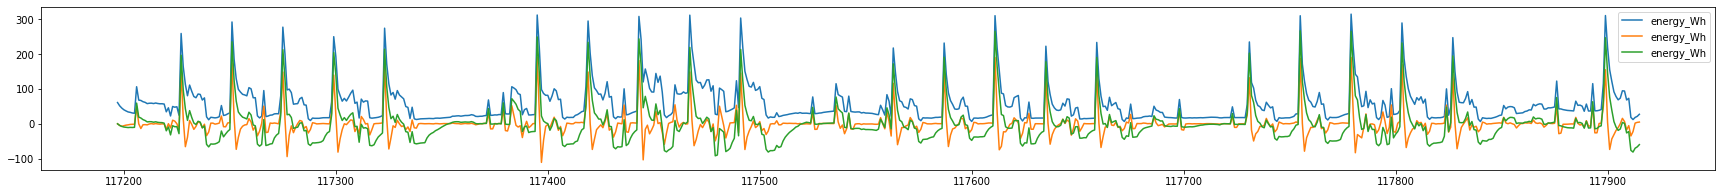

In [38]:
plt.figure(figsize=(30,3))
orig_data.plot()
(orig_data-rolling_mean_3).plot()
#(orig_data-rolling_mean_10).plot()
(orig_data-rolling_mean_20).plot()
plt.legend()

<AxesSubplot:>

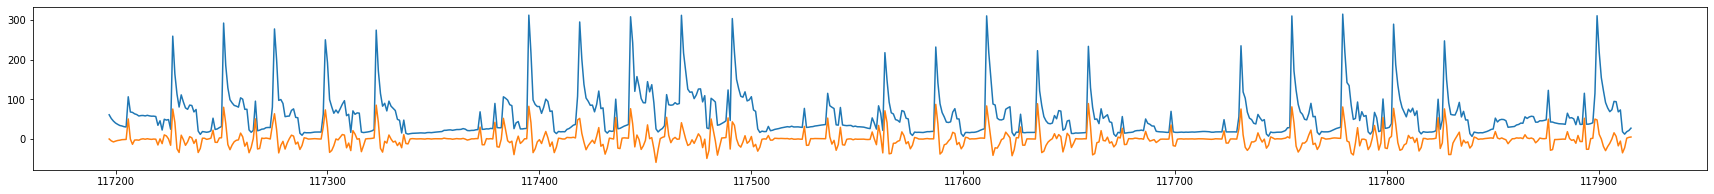

In [39]:
plt.figure(figsize=(30,3))
orig_data.plot()
(clipped-rolling_mean_c_3).plot()

<AxesSubplot:>

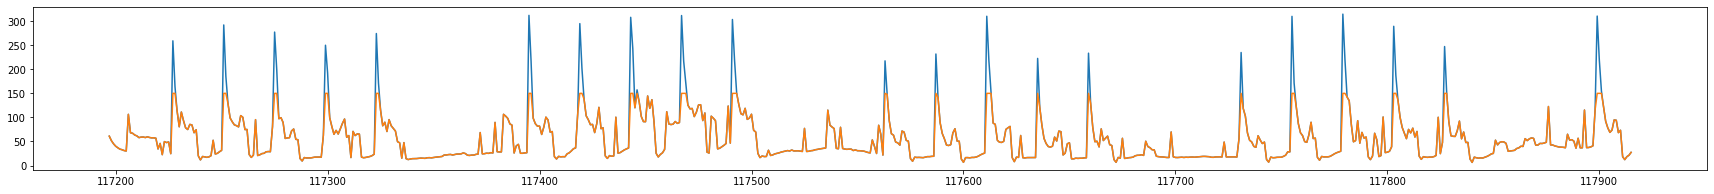

In [40]:
plt.figure(figsize=(30,3))
orig_data.plot()
clipped.plot()